<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Image Samples

In [1]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

In [2]:
# path = "/content/120228670_620441935303022_1069361339419742903_n.png"
path = "/content/120280474_1028756654237438_2800983497454357288_n.png"

#Get all of the coordinates of the edge of the segmented mask(Red Version)

In [3]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (100,0,0)
# upper = (255,0,0)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)

# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Blue Version

In [4]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (0,0,100)
# upper = (255,255,255)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)


# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)
# # cv2_imshow(opening)
# # cv2_imshow(closing)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Mask from binary mask

[[57, 22], [56, 23], [55, 23], [54, 23], [53, 24], [52, 24], [51, 24], [51, 25], [50, 26], [49, 27], [49, 28], [49, 29], [48, 30], [48, 31], [48, 32], [47, 33], [48, 34], [48, 35], [48, 36], [48, 37], [48, 38], [48, 39], [49, 40], [50, 41], [51, 42], [51, 43], [52, 44], [53, 45], [54, 46], [55, 47], [55, 48], [56, 49], [56, 50], [57, 51], [58, 52], [58, 53], [58, 54], [57, 55], [57, 56], [57, 57], [56, 58], [56, 59], [56, 60], [56, 61], [56, 62], [56, 63], [55, 64], [55, 65], [55, 66], [55, 67], [55, 68], [55, 69], [55, 70], [56, 71], [57, 71], [58, 71], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 70], [65, 70], [66, 70], [67, 70], [68, 70], [69, 70], [70, 70], [71, 69], [72, 69], [73, 69], [74, 69], [75, 68], [76, 68], [77, 68], [78, 68], [79, 67], [80, 67], [81, 67], [82, 67], [83, 66], [84, 66], [85, 66], [86, 66], [87, 65], [87, 64], [87, 63], [87, 62], [87, 61], [87, 60], [87, 59], [87, 58], [87, 57], [87, 56], [87, 55], [87, 54], [87, 53], [87, 52], [86, 51], [86, 50],

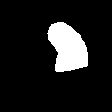

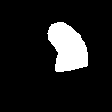

In [5]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (200,200,200)
upper = (255,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)

# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(img)
cv2_imshow(thresh)

# cv2_imshow(opening)
# cv2_imshow(closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
pointGroups = []
index = 0
subgroup = [points[0]]

for i in range(len(points) - 1):
  prevPoint = points[i]
  currentPoint = points[i+1]

  if abs(prevPoint[0]-currentPoint[0]) <= 1 and abs(prevPoint[1]-currentPoint[1]) <= 1:
    subgroup.append(currentPoint)
  else:
    pointGroups.append(subgroup[:])
    subgroup = [currentPoint]

pointGroups.append(subgroup)

mainPointGroup = []
maxPointGroupSize = 0

for group in pointGroups:
  if len(group) > maxPointGroupSize:
    maxPointGroup = group
    maxPointGroupSize = len(group)

points = maxPointGroup[:]

# Top 5 and Bottom 5 Analysis(Heuristic 2)


In [7]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 15

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  if point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

if slope > 0:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)
else:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
condition = True
if slope > 0:
  while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX += 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr -= 1
else:
  while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX -= 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr += 1

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()


# Finding Min Top and Max Bottom
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

x1, y1 = TopCoord
x2, y2 = BottomCoord

if (x1 + y1) > (x2 + y2):
  x1, y1, x2, y2 = x2, y2, x1, y1

print(x1, y1, x2, y2)

54 23 76 68


# Calculate Weighted Average

In [8]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[74.95238095238095, 65.85714285714286], [73.9047619047619, 63.714285714285715], [72.85714285714286, 61.57142857142857], [71.80952380952381, 59.42857142857143], [70.76190476190476, 57.285714285714285], [69.71428571428571, 55.142857142857146], [68.66666666666667, 53.0], [67.61904761904762, 50.857142857142854], [66.57142857142857, 48.714285714285715], [65.52380952380952, 46.57142857142857], [64.47619047619048, 44.42857142857143], [63.42857142857143, 42.285714285714285], [62.38095238095238, 40.142857142857146], [61.333333333333336, 38.0], [60.285714285714285, 35.857142857142854], [59.23809523809524, 33.714285714285715], [58.19047619047619, 31.571428571428573], [57.142857142857146, 29.428571428571427], [56.095238095238095, 27.285714285714285], [55.04761904761905, 25.142857142857142]]


# Find All Mask White points

In [9]:
p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherIntercept = points[lowerIndex:higherIndex]
lowerIntercept = points[higherIndex:] + points[:lowerIndex]

if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
  lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

print(lowerIntercept)
print(higherIntercept)

[[76, 68], [77, 68], [78, 68], [79, 67], [80, 67], [81, 67], [82, 67], [83, 66], [84, 66], [85, 66], [86, 66], [87, 65], [87, 64], [87, 63], [87, 62], [87, 61], [87, 60], [87, 59], [87, 58], [87, 57], [87, 56], [87, 55], [87, 54], [87, 53], [87, 52], [86, 51], [86, 50], [86, 49], [86, 48], [86, 47], [85, 46], [85, 45], [84, 44], [84, 43], [84, 42], [83, 41], [82, 40], [81, 39], [81, 38], [80, 37], [80, 36], [80, 35], [79, 34], [78, 33], [77, 33], [76, 32], [75, 31], [74, 30], [73, 29], [72, 28], [71, 27], [70, 26], [69, 26], [68, 25], [67, 25], [66, 24], [65, 23], [64, 23], [63, 22], [62, 22], [61, 22], [60, 22], [59, 22], [58, 22], [57, 22], [56, 23], [55, 23]]
[[54, 23], [53, 24], [52, 24], [51, 24], [51, 25], [50, 26], [49, 27], [49, 28], [49, 29], [48, 30], [48, 31], [48, 32], [47, 33], [48, 34], [48, 35], [48, 36], [48, 37], [48, 38], [48, 39], [49, 40], [50, 41], [51, 42], [51, 43], [52, 44], [53, 45], [54, 46], [55, 47], [55, 48], [56, 49], [56, 50], [57, 51], [58, 52], [58, 53]

In [31]:
def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  # print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, len(higherInterceptAveragePoints))
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(perp_slope) > 6) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(slope) > 6) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif count >= len(higherIntercept)-1:
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, len(lowerInterceptAveragePoints))
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# False 0 1 [62, 20] [62, 19] [62.0001, 20.285714285714285] 12857.142856716035 2857.1428570479998 0.003003003003003003 61.93993993993994
# False 0 2 [63, 21] [62, 20] [62.0001, 20.285714285714285] 2857.1428570479998 0.7143571500007178 0.003003003003003003 62.93693693693694
# False 0 3 [64, 22] [63, 21] [62.0001, 20.285714285714285] 0.7143571500007178 0.8571857164286805 0.003003003003003003 63.933933933933936
# False 0 4 [65, 23] [64, 22] [62.0001, 20.285714285714285] 0.8571857164286805 0.9047920644973894 0.003003003003003003 64.93093093093093

        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(perp_slope) > 6) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            print("here1")
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(slope) > 6) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):

            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif count >= len(lowerIntercept)-1:
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
        print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  matchedAveragePoints = [lowerInterceptAveragePoints[i] + higherInterceptAveragePoints[i] for i in range(len(lowerInterceptAveragePoints))]
  matchedAveragePoints.sort(key=lambda coord: (coord[0] + coord[2]) - perp_slope*(coord[1] + coord[3]))
  lowerInterceptAveragePoints = [[matchedAveragePoints[i][0], matchedAveragePoints[i][1]] for i in range(len(matchedAveragePoints))]
  higherInterceptAveragePoints = [[matchedAveragePoints[i][2], matchedAveragePoints[i][3]] for i in range(len(matchedAveragePoints))]

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

In [32]:
i = 0

x1, y1 = lowerIntercept[i]
x2, y2 = higherIntercept[i]

slope = getSlope([x1, y1], [x2, y2])

p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherInterceptPoints = points[lowerIndex:higherIndex]
lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
  lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

False 0 1 [54, 23] [54, 23] [55.04761904761905, 25.142857142857142] 2.0454545454545454 2.0454545454545383 2.0454545454545383 -0.4888888888888889 65.24444444444444
False 0 2 [53, 24] [54, 23] [55.04761904761905, 25.142857142857142] 2.0454545454545454 2.0454545454545383 0.5581395348837198 -0.4888888888888889 64.73333333333333
False 0 3 [52, 24] [53, 24] [55.04761904761905, 25.142857142857142] 2.0454545454545454 0.5581395348837198 0.37499999999999944 -0.4888888888888889 63.733333333333334
False 0 4 [51, 24] [52, 24] [55.04761904761905, 25.142857142857142] 2.0454545454545454 0.37499999999999944 0.28235294117647025 -0.4888888888888889 62.733333333333334
False 0 5 [51, 25] [51, 24] [55.04761904761905, 25.142857142857142] 2.0454545454545454 0.28235294117647025 0.03529411764705867 -0.4888888888888889 63.22222222222222
False 0 6 [50, 26] [51, 25] [55.04761904761905, 25.142857142857142] 2.0454545454545454 0.03529411764705867 -0.16981132075471697 -0.4888888888888889 62.71111111111111
False 0 7 [4

76 68
54 23
[[55.04761904761905, 25.142857142857142], [56.095238095238095, 27.285714285714285], [57.142857142857146, 29.428571428571427], [58.19047619047619, 31.571428571428573], [59.23809523809524, 33.714285714285715], [60.285714285714285, 35.857142857142854], [61.333333333333336, 38.0001], [62.38095238095238, 40.142857142857146], [63.42857142857143, 42.285714285714285], [64.47619047619048, 44.42857142857143], [65.52380952380952, 46.57142857142857], [66.57142857142857, 48.714285714285715], [67.61904761904762, 50.857142857142854], [68.66666666666667, 53.0001], [69.71428571428571, 55.142857142857146], [70.76190476190476, 57.285714285714285], [71.80952380952381, 59.42857142857143], [72.85714285714286, 61.57142857142857], [73.9047619047619, 63.714285714285715], [74.95238095238095, 65.85714285714286]]


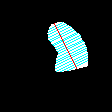

[[54, 23], [53, 24], [52, 24], [51, 24], [51, 25], [50, 26], [49, 27], [49, 28], [49, 29], [48, 30], [48, 31], [48, 32], [47, 33], [48, 34], [48, 35], [48, 36], [48, 37], [48, 38], [48, 39], [49, 40], [50, 41], [51, 42], [51, 43], [52, 44], [53, 45], [54, 46], [55, 47], [55, 48], [56, 49], [56, 50], [57, 51], [58, 52], [58, 53], [58, 54], [57, 55], [57, 56], [57, 57], [56, 58], [56, 59], [56, 60], [56, 61], [56, 62], [56, 63], [55, 64], [55, 65], [55, 66], [55, 67], [55, 68], [55, 69], [55, 70], [56, 71], [57, 71], [58, 71], [59, 71], [60, 71], [61, 71], [62, 71], [63, 71], [64, 70], [65, 70], [66, 70], [67, 70], [68, 70], [69, 70], [70, 70], [71, 69], [72, 69], [73, 69], [74, 69], [75, 68]]
[[76, 68], [77, 68], [78, 68], [79, 67], [80, 67], [81, 67], [82, 67], [83, 66], [84, 66], [85, 66], [86, 66], [87, 65], [87, 64], [87, 63], [87, 62], [87, 61], [87, 60], [87, 59], [87, 58], [87, 57], [87, 56], [87, 55], [87, 54], [87, 53], [87, 52], [86, 51], [86, 50], [86, 49], [86, 48], [86, 47]

In [33]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for j in range(len(lowerInterceptAveragePoints)): 
    cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)

for point in lowerInterceptAveragePoints:
  if point == [42, 56]:
    cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)



cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)

print(lowerInterceptPoints)
print(higherInterceptPoints)
print(weighted_avg)
print(lowerInterceptAveragePoints)
print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Split points into 2

In [13]:
# def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
#   # Calculate perpendicular slope
#   try:
#     perp_slope = -1/slope
#   except:
#     perp_slope = 10000

#   # Indexing
#   lowerIndex = 0
#   higherIndex = 0

#   # Make sure its from top to bottom direction
#   if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
#     weighted_avg = weighted_avg[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
#       higherIntercept = higherIntercept[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
#       lowerIntercept = lowerIntercept[::-1]

#   higherInterceptAveragePoints = []
#   lowerInterceptAveragePoints = []

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = higherIntercept[higherIndex]
#         if higherIndex == 0:
#           prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = higherIntercept[higherIndex-1]
        
#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(higherIntercept)/2:
#           higherIndex -= count
#           if higherIndex == 0:
#             higherInterceptAveragePoints.append(start_point)
#           else:
#             higherInterceptAveragePoints.append(higherIntercept[higherIndex])
#           condition = False
        
#         count += 1
#         higherIndex += 1
#     except:
#       higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = lowerIntercept[lowerIndex]
#         if lowerIndex == 0:
#           prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = lowerIntercept[lowerIndex-1]

#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(lowerIntercept)/2:
#           lowerIndex -= count
#           if lowerIndex == 0:
#             lowerInterceptAveragePoints.append(start_point)
#           else:
#             lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
#           condition = False
        
#         count += 1
#         lowerIndex += 1
#     except:
#       lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  
#   if i == 30:
#       print(higherIntercept)
#       print(lowerIntercept)
#       print(weighted_avg)
#       print(lowerInterceptAveragePoints)
#       print(higherInterceptAveragePoints)
#   return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

#  \


In [14]:
# i = 30

# x1, y1 = lowerIntercept[i]
# x2, y2 = higherIntercept[i]

# print(x1, y1, x2, y2)

# slope = getSlope([x1, y1], [x2, y2])

# p1Index = points.index([x1, y1])
# p2Index = points.index([x2, y2])

# lowerIndex = min(p1Index, p2Index)
# higherIndex = max(p1Index, p2Index)

# higherInterceptPoints = points[lowerIndex:higherIndex]
# lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

# if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
#   lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

# weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
# lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

76 68
54 23
[[55.04761904761905, 25.142857142857142], [56.095238095238095, 27.285714285714285], [57.142857142857146, 29.428571428571427], [58.19047619047619, 31.571428571428573], [59.23809523809524, 33.714285714285715], [60.285714285714285, 35.857142857142854], [61.333333333333336, 38.0001], [62.38095238095238, 40.142857142857146], [63.42857142857143, 42.285714285714285], [64.47619047619048, 44.42857142857143], [65.52380952380952, 46.57142857142857], [66.57142857142857, 48.714285714285715], [67.61904761904762, 50.857142857142854], [68.66666666666667, 53.0001], [69.71428571428571, 55.142857142857146], [70.76190476190476, 57.285714285714285], [71.80952380952381, 59.42857142857143], [72.85714285714286, 61.57142857142857], [73.9047619047619, 63.714285714285715], [74.95238095238095, 65.85714285714286]]


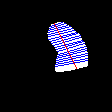

In [23]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)


# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Method of Disks

In [16]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

28401.98966354617


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [17]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area * long_axis_length

print(volume)

54913.83328920935


# Prolate Ellipsoid Model (Biplane Area Length)

In [18]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

20404.621820153345


# Bullet Method


In [19]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

area = math.pi * (midLength/2)**2 

# Volume Calc
volume = 5/6 * area * long_axis_length

print(volume)

25505.777275191685


# Will become local file


In [34]:
import cv2
import numpy as np
import math
import os

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (200,200,200)
  upper = (255,255,255)

  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  result = np.zeros_like(thresh)
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  return points

def getIdealPointGroup(points):
  pointGroups = []
  index = 0
  subgroup = [points[0]]

  for i in range(len(points) - 1):
    prevPoint = points[i]
    currentPoint = points[i+1]

    if (abs(int(prevPoint[0])-int(currentPoint[0])) <= 1) and (abs(int(prevPoint[1])-int(currentPoint[1])) <= 1):
      subgroup.append(currentPoint)
    else:
      pointGroups.append(subgroup[:])
      subgroup = [currentPoint]

  pointGroups.append(subgroup)

  mainPointGroup = []
  maxPointGroupSize = 0

  for group in pointGroups:
    if len(group) > maxPointGroupSize:
      maxPointGroup = group
      maxPointGroupSize = len(group)

  return maxPointGroup

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 15

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    if point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
  slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  condition = True
  if slope > 0:
    while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX += 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr -= 1
  else:
    while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX -= 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr += 1

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()


  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherIntercept = points[lowerIndex:higherIndex]
  lowerIntercept = points[higherIndex:] + points[:lowerIndex]

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Change to Method of Disks
def volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

# Prolate Ellipsoid Method
def volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = long_axis_length/21

  # Manual Area Calc
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  volume = 0.85 * area * long_axis_length

  return volume

# Bullet Method Calculation
def volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lens
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  area = math.pi * (midLength/2)**2 

  # Volume Calc
  volume = 5/6 * area * long_axis_length

  return volume

def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  # print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, len(higherInterceptAveragePoints))
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(perp_slope) > 6) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(slope) > 6) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif count >= len(higherIntercept)-1:
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, len(lowerInterceptAveragePoints))
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# False 0 1 [62, 20] [62, 19] [62.0001, 20.285714285714285] 12857.142856716035 2857.1428570479998 0.003003003003003003 61.93993993993994
# False 0 2 [63, 21] [62, 20] [62.0001, 20.285714285714285] 2857.1428570479998 0.7143571500007178 0.003003003003003003 62.93693693693694
# False 0 3 [64, 22] [63, 21] [62.0001, 20.285714285714285] 0.7143571500007178 0.8571857164286805 0.003003003003003003 63.933933933933936
# False 0 4 [65, 23] [64, 22] [62.0001, 20.285714285714285] 0.8571857164286805 0.9047920644973894 0.003003003003003003 64.93093093093093

        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if slopeCond and not betweenCond:            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(perp_slope) > 6) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            print("here1")
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(slope) > 6) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):

            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif count >= len(lowerIntercept)-1:
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  matchedAveragePoints = [lowerInterceptAveragePoints[i] + higherInterceptAveragePoints[i] for i in range(len(lowerInterceptAveragePoints))]
  matchedAveragePoints.sort(key=lambda coord: (coord[0] + coord[2]) - perp_slope*(coord[1] + coord[3]))
  lowerInterceptAveragePoints = [[matchedAveragePoints[i][0], matchedAveragePoints[i][1]] for i in range(len(matchedAveragePoints))]
  higherInterceptAveragePoints = [[matchedAveragePoints[i][2], matchedAveragePoints[i][3]] for i in range(len(matchedAveragePoints))]

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


def calculateVolume(path, number, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1

  mainLineSlope = getSlope([x1, y1], [x2, y2])
  baseAngle = math.atan(mainLineSlope)

  if baseAngle>0:
      baseAngle -= math.pi
  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
  degrees = {}

  # Volumes for all 0 to 5 cases
  for i in range(-30, 31, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]


    slope = getSlope([x1, y1], [x2, y2])
    angle = math.atan(slope)

    if angle>0:
      angle -= math.pi

    degrees[i] = (baseAngle - angle) * 180/math.pi


    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
      lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    # if i < 100:
    #   print(i)
    #   image = cv2.imread(path) 


    #   # for point in points:
    #   #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
    #   #   if point[0] <50:
    #   #     print(point)


    #   # for point in weighted_avg: 
    #   #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
    #   for j in range(len(lowerInterceptAveragePoints)): 
    #     cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


    #   cv2.line(image, (x1, y1), (x2, y2), (0,0,0), 1)

    #   cv2_imshow(image)
    #   cv2.waitKey(0)
    #   cv2.destroyAllWindows()

    if  method == "Method of Disks":
      volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s, degrees)

print(calculateVolume(path, 20, method = "Method of Disks"))
# print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
# print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
# print(calculateVolume("/content/output/image.png", method = "Bullet"))

Streaming output truncated to the last 5000 lines.
False 12 4 [52, 44] [51, 43] [64.14285714285714, 53.80952380952381] -1.3333333333333333 0.8224637681159424 0.8078431372549023 0.75 19.0
False 12 5 [53, 45] [52, 44] [64.14285714285714, 53.80952380952381] -1.3333333333333333 0.8078431372549023 0.7905982905982909 0.75 19.25
False 12 6 [54, 46] [53, 45] [64.14285714285714, 53.80952380952381] -1.3333333333333333 0.7905982905982909 0.7699530516431928 0.75 19.5
True 13 7 [55, 47] [54, 46] [64.14285714285714, 53.80952380952381] -1.3333333333333333 0.7699530516431928 0.7447916666666671 0.75 19.75
False 13 1 [55, 47] [54, 46] [63.0001, 55.333333333333336] -1.3333333333333333 1.0370255145313199 1.0416536459960917 0.75 19.75
False 13 2 [55, 48] [55, 47] [63.0001, 55.333333333333336] -1.3333333333333333 1.0416536459960917 0.9166552084765607 0.75 19.0
False 13 3 [56, 49] [55, 48] [63.0001, 55.333333333333336] -1.3333333333333333 0.9166552084765607 0.9047489797764793 0.75 19.25
False 13 4 [56, 50] [